In [79]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [80]:
def generate_wiener_trajectory(T, n_points):
    dt = T / n_points
    increments = np.random.normal(0, np.sqrt(dt), n_points)
    trajectory = np.concatenate((np.arange(1) , np.cumsum(increments)))
    return trajectory
def ito_integrate(function, trajectory):
    increments = np.diff(trajectory)
    values = function(trajectory[:-1])
    return np.concatenate(([0], np.cumsum(increments * values)))
def supremum_distance(f1, f2):
    return np.max(np.abs(f1 - f2))

In [81]:
np.random.seed(42)

In [82]:
T = 1
n_points = 1000000
trajectory = generate_wiener_trajectory(T, n_points)
times = np.linspace(0, T, n_points+1)
tranformed_trajectory = 0.5*(trajectory**2 - times)
ito_integral = ito_integrate(lambda x: x, trajectory)

Text(0.5, 1.0, 'Trajectory comparison')

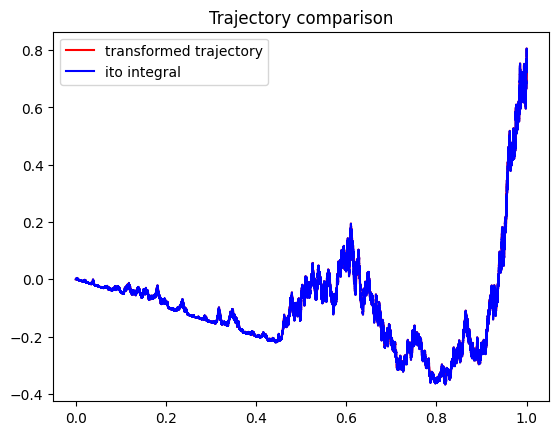

In [83]:
plt.plot(times, tranformed_trajectory, color='red', label='transformed trajectory')
plt.plot(times, ito_integral, color='blue', label='ito integral')
plt.legend()
plt.title("Trajectory comparison")

In [84]:
supremum_distance(tranformed_trajectory, ito_integral)

np.float64(0.0005970616769176151)

# Dla różnych długości próbek (ziarnistości symulacji) uśredniamy metrykę supremum

In [78]:
n_pointss = [10,100,1000,10000,100000,1000000,10000000]
avg_distances = []
for n_points in tqdm(n_pointss):
    distance = 0
    for i in range(10):
        trajectory = generate_wiener_trajectory(T, n_points)
        times = np.linspace(0, T, n_points+1)
        tranformed_trajectory = 0.5*(trajectory**2 - times)
        ito_integral = ito_integrate(lambda x: x, trajectory)
        distance += supremum_distance(tranformed_trajectory, ito_integral)
    avg_distances.append(distance/10)

100%|██████████| 7/7 [00:03<00:00,  2.30it/s]


Text(0, 0.5, 'average supremum distance')

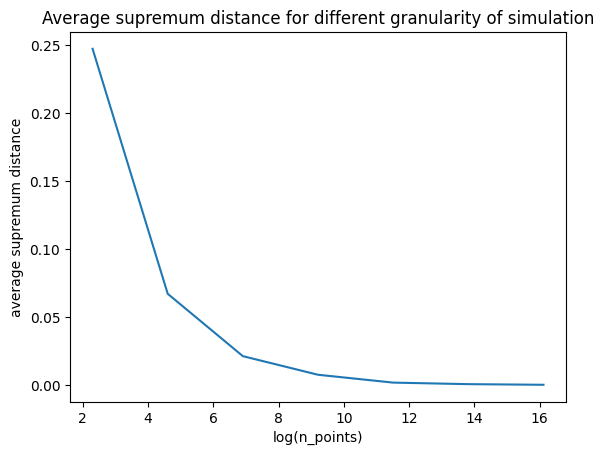

In [85]:
log_n_pointss = np.log(n_pointss)
plt.plot(log_n_pointss, avg_distances)
plt.title("Average supremum distance for different granularity of simulation")
plt.xlabel("log(n_points)")
plt.ylabel("average supremum distance")

array([ 0.00000000e+00,  0.00000000e+00, -1.19070237e-05, ...,
       -4.50599131e-01, -4.49757896e-01, -4.50813987e-01])

100001

100001